# Introduction
## Solver
Quantum mechanical systems can be described by differential equations.
In this notebook we will solve Schroedinger's equation, which describes the
time evolution of a quantum mechanical state by multiplication with the
Hamilton operator:

\begin{equation}
i \hbar \partial_t \psi = H \psi
\end{equation}

Thus we can describe a system's evolution by its Hamilton operator.
For systems of small dimension it is more performant to store operators in a
dense format.

We split the Hamilton operator in a drift and a control part

\begin{align*}
H = H_d + H_c,
\end{align*}

where the latter can be written as sum weighted by control amplitudes

\begin{align*}
H_c = \sum_n u_n H_n.
\end{align*}

Lets consider a qubit under Rabi driving expressed as XY-control with the
Hamilton operator

\begin{align*}
H = \hbar \delta_\omega \sigma_z / 2 + \hbar A_x \sigma_x / 2
+ \hbar A_y \sigma_y / 2
\end{align*}

where $\delta_\omega$ is the frequency detuning and $A$ the driving amplitude.
Lets set $\hbar = 1$ for simplicity, then we can split the Hamilton operator:

\begin{align*}
H_c &= A_x \sigma_x / 2 + A_y \sigma_y / 2 \\
H_d &= \delta_\omega \sigma_z / 2
\end{align*}


In [5]:
import numpy as np

from qsim.matrix import DenseOperator

sigma_x = DenseOperator(np.asarray([[0, 1], [1, 0]]))
sigma_y = DenseOperator(np.asarray([[0, -1j], [1j, 0]]))
sigma_z = DenseOperator(np.asarray([[1, 0], [0, -1]]))
zero_matrix = DenseOperator(np.asarray([[0, 0], [0, 0]]))

delta_omega = 0

h_ctrl = [.5 * sigma_x, .5 * sigma_y]
h_drift = [delta_omega * .5 * sigma_z]

For computational feasibility, we make the assumption of piece wise constant
control.

In [6]:
n_time_steps = 5
total_time = 1

time_steps = (total_time / n_time_steps) * np.ones((n_time_steps, ))

And set the control amplitudes to values resulting in an $X_\pi$-Rotation.

In [7]:
control_amplitudes = np.zeros((n_time_steps, len(h_ctrl)))
control_amplitudes[:, 0] = np.pi

Then we initialize a a solver for Schroedinger's equation, solve the equation
and plot the corresponding pulse.

Total unitary of the evolution: 
[[0.0000000e+00+0.j 0.0000000e+00-1.j]
 [0.0000000e+00-1.j 4.4408921e-16+0.j]]


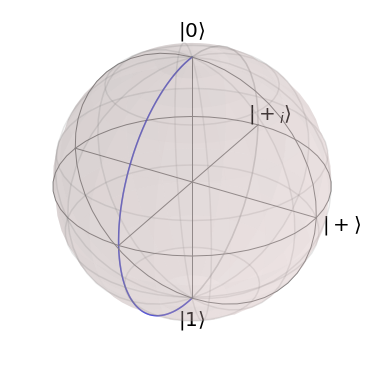

In [8]:
from qsim.solver_algorithms import SchroedingerSolver

solver = SchroedingerSolver(
    h_drift=h_drift * n_time_steps,
    h_ctrl=h_ctrl,
    tau=time_steps
)
solver.set_optimization_parameters(control_amplitudes)

print('Total unitary of the evolution: ')
print(solver.forward_propagators[-1].data)

solver.plot_bloch_sphere()